This notebook is part of the $\omega radlib$ documentation: https://docs.wrl.vis.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray GAMIC backend

In this example, we read GAMIC (HDF5) data files using the xradar `gamic` backend.

In [1]:
import glob
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import datatree as xt
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load GAMIC HDF5 Volume Data

In [2]:
fpath = "hdf5/DWD-Vol-2_99999_20180601054047_00.h5"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_gamic_datatree(f)

## Inspect RadarVolume

In [3]:
display(vol)

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2018-06-01T05:40:47Z'
│       time_coverage_end    <U20 '2018-06-01T05:44:16Z'
│       longitude            float64 6.457
│       altitude             float64 310.0
│       latitude             float64 50.93
│   Attributes:
│       Conventions:      None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 361, range: 360)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:40:57.362999808...
│         * range              (range) float32 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5219 1.519 2.53 ... 357.5 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│           RHOHV              (azimuth, range) float32 ...
│           DBTH               (azimuth, range) float32 ...
│           DBTV               (azimuth, range) float32 ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 361, range: 500)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:41:10.996999936...
│         * range              (range) float32 50.0 150.0 250.0 ... 4.985e+04 4.995e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5246 1.533 2.543 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│           RHOHV              (azimuth, range) float32 ...
│           DBTH               (azimuth, range) float32 ...
│           DBTV               (azimuth, range) float32 ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 361, range: 620)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:41:24.842999808...
│         * range              (range) float32 50.0 150.0 250.0 ... 6.185e+04 6.195e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5191 1.524 2.527 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│     

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

DataTree('root', parent=None)
│   Dimensions:              ()
│   Data variables:
│       volume_number        int64 0
│       platform_type        <U5 'fixed'
│       instrument_type      <U5 'radar'
│       time_coverage_start  <U20 '2018-06-01T05:40:47Z'
│       time_coverage_end    <U20 '2018-06-01T05:44:16Z'
│       longitude            float64 6.457
│       altitude             float64 310.0
│       latitude             float64 50.93
│   Attributes:
│       Conventions:      None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
│       instrument_name:  None
├── DataTree('sweep_0')
│       Dimensions:            (azimuth: 361, range: 360)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:40:57.362999808...
│         * range              (range) float32 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5219 1.519 2.53 ... 357.5 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│           RHOHV              (azimuth, range) float32 ...
│           DBTH               (azimuth, range) float32 ...
│           DBTV               (azimuth, range) float32 ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_1')
│       Dimensions:            (azimuth: 361, range: 500)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:41:10.996999936...
│         * range              (range) float32 50.0 150.0 250.0 ... 4.985e+04 4.995e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5246 1.533 2.543 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│           RHOHV              (azimuth, range) float32 ...
│           DBTH               (azimuth, range) float32 ...
│           DBTV               (azimuth, range) float32 ...
│           ...                 ...
│           PHIDP              (azimuth, range) float32 ...
│           sweep_mode         <U20 ...
│           sweep_number       int64 ...
│           prt_mode           <U7 ...
│           follow_mode        <U7 ...
│           sweep_fixed_angle  float64 ...
├── DataTree('sweep_2')
│       Dimensions:            (azimuth: 361, range: 620)
│       Coordinates:
│           elevation          (azimuth) float64 ...
│           time               (azimuth) datetime64[ns] 2018-06-01T05:41:24.842999808...
│         * range              (range) float32 50.0 150.0 250.0 ... 6.185e+04 6.195e+04
│           longitude          float64 ...
│           latitude           float64 ...
│           altitude           float64 ...
│         * azimuth            (azimuth) float64 0.5191 1.524 2.527 ... 358.5 359.5
│       Data variables: (12/17)
│           DBZH               (azimuth, range) float32 ...
│           DBZV               (azimuth, range) float32 ...
│           KDP                (azimuth, range) float32 ...
│     

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

DataTree('sweep_0', parent="root")
    Dimensions:            (azimuth: 361, range: 360)
    Coordinates:
        elevation          (azimuth) float64 ...
        time               (azimuth) datetime64[ns] 2018-06-01T05:40:57.362999808...
      * range              (range) float32 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
        longitude          float64 ...
        latitude           float64 ...
        altitude           float64 ...
      * azimuth            (azimuth) float64 0.5219 1.519 2.53 ... 357.5 358.5 359.5
    Data variables: (12/17)
        DBZH               (azimuth, range) float32 ...
        DBZV               (azimuth, range) float32 ...
        KDP                (azimuth, range) float32 ...
        RHOHV              (azimuth, range) float32 ...
        DBTH               (azimuth, range) float32 ...
        DBTV               (azimuth, range) float32 ...
        ...                 ...
        PHIDP              (azimuth, range) float32 ...
        sweep_mode         <U20 ...
        sweep_number       int64 ...
        prt_mode           <U7 ...
        follow_mode        <U7 ...
        sweep_fixed_angle  float64 ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds.copy()
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)

In [7]:
swp = swp.wrl.georef.georeference()
display(swp)

<xarray.Dataset>
Dimensions:            (azimuth: 361, range: 360)
Coordinates: (12/15)
    elevation          (azimuth) float64 28.0 28.0 28.0 28.0 ... 28.0 28.0 28.0
    time               (azimuth) datetime64[ns] 2018-06-01T05:40:57.362999808...
  * range              (range) float32 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
    sweep_mode         <U20 'azimuth_surveillance'
    longitude          float64 6.457
    latitude           float64 50.93
    ...                 ...
    y                  (azimuth, range) float64 44.14 132.4 ... 3.168e+04
    z                  (azimuth, range) float64 333.5 380.4 ... 1.725e+04
    gr                 (azimuth, range) float64 44.11 132.4 ... 3.168e+04
    rays               (azimuth, range) float64 0.5219 0.5219 ... 359.5 359.5
    bins               (azimuth, range) float32 50.0 150.0 ... 3.595e+04
    crs_wkt            int64 0
Data variables: (12/16)
    DBZH               (azimuth, range) float32 ...
    DBZV               (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    RHOHV              (azimuth, range) float32 ...
    DBTH               (azimuth, range) float32 ...
    DBTV               (azimuth, range) float32 ...
    ...                 ...
    WRADV              (azimuth, range) float32 ...
    PHIDP              (azimuth, range) float32 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by ODIM_H5 standard.

In [8]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 361, range: 360)>
[129960 values with dtype=float32]
Coordinates: (12/15)
    elevation   (azimuth) float64 28.0 28.0 28.0 28.0 ... 28.0 28.0 28.0 28.0
    time        (azimuth) datetime64[ns] 2018-06-01T05:40:57.362999808 ... 20...
  * range       (range) float32 50.0 150.0 250.0 ... 3.585e+04 3.595e+04
    sweep_mode  <U20 'azimuth_surveillance'
    longitude   float64 6.457
    latitude    float64 50.93
    ...          ...
    y           (azimuth, range) float64 44.14 132.4 ... 3.159e+04 3.168e+04
    z           (azimuth, range) float64 333.5 380.4 ... 1.72e+04 1.725e+04
    gr          (azimuth, range) float64 44.11 132.4 ... 3.159e+04 3.168e+04
    rays        (azimuth, range) float64 0.5219 0.5219 0.5219 ... 359.5 359.5
    bins        (azimuth, range) float32 50.0 150.0 ... 3.585e+04 3.595e+04
    crs_wkt     int64 0
Attributes:
    format:         UV8
    is_dft:         0
    unit:           dBZ
    long_name:      Equivalent reflectivity factor H
    units:          dBZ
    standard_name:  radar_equivalent_reflectivity_factor_h
    _Undetect:      0.0

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

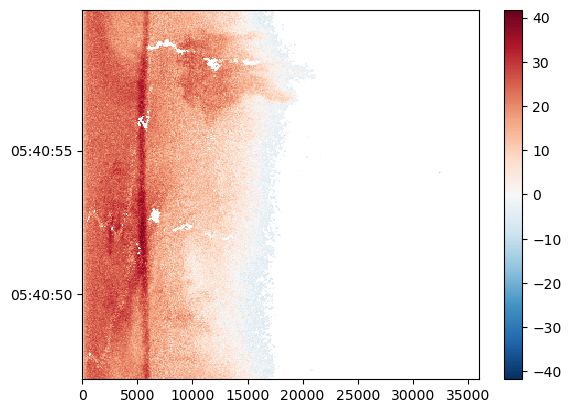

In [9]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

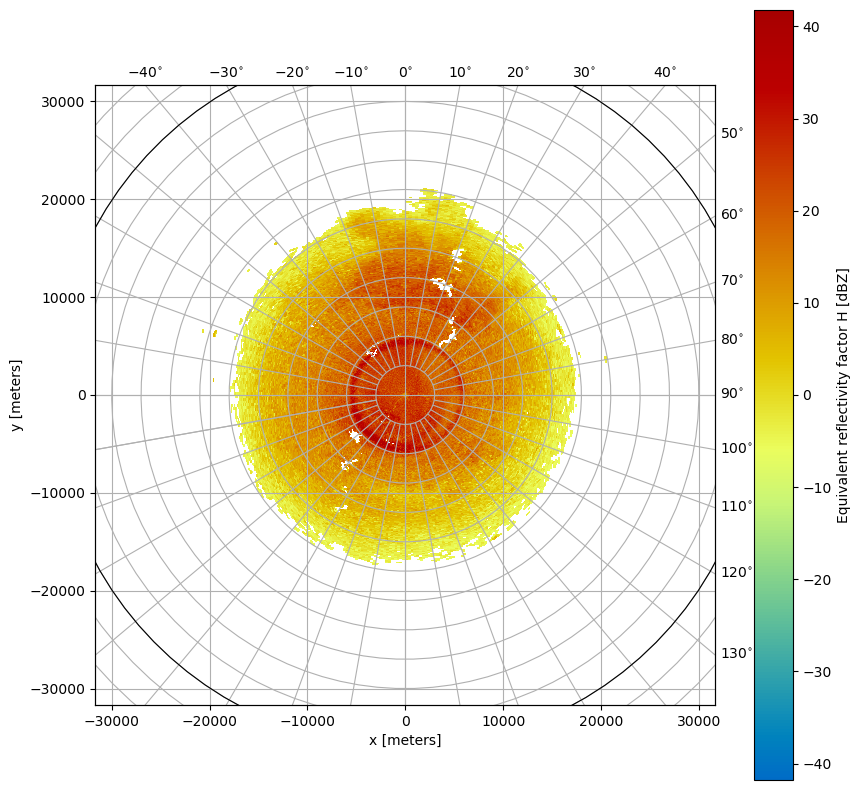

In [10]:
fig = plt.figure(figsize=(10, 10))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 3e3}, fig=fig)

## Retrieve explicit group


In [11]:
swp_b = xr.open_dataset(
    f, engine="gamic", group="sweep_9", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset>
Dimensions:            (azimuth: 360, range: 1000)
Coordinates:
    elevation          (azimuth) float64 ...
    time               (azimuth) datetime64[ns] ...
  * range              (range) float32 75.0 225.0 375.0 ... 1.498e+05 1.499e+05
    longitude          float64 ...
    latitude           float64 ...
    altitude           float64 ...
  * azimuth            (azimuth) float64 0.5109 1.519 2.519 ... 358.5 359.5
Data variables: (12/17)
    DBZH               (azimuth, range) float32 ...
    DBZV               (azimuth, range) float32 ...
    KDP                (azimuth, range) float32 ...
    RHOHV              (azimuth, range) float32 ...
    DBTH               (azimuth, range) float32 ...
    DBTV               (azimuth, range) float32 ...
    ...                 ...
    PHIDP              (azimuth, range) float32 ...
    sweep_mode         <U20 ...
    sweep_number       int64 ...
    prt_mode           <U7 ...
    follow_mode        <U7 ...
    sweep_fixed_angle  float64 ...